<a href="https://colab.research.google.com/github/FelipeGBarreto/Projects/blob/master/An%C3%A1lise_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Gorjetas de um Restaurante
***

## 00. Importando as bibliotecas necessárias<font>

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Ou warnings.filterwarnings('action=once')

## 01. Verificando o dataset

In [453]:
df = pd.read_csv("tips.csv")
df[:5]

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


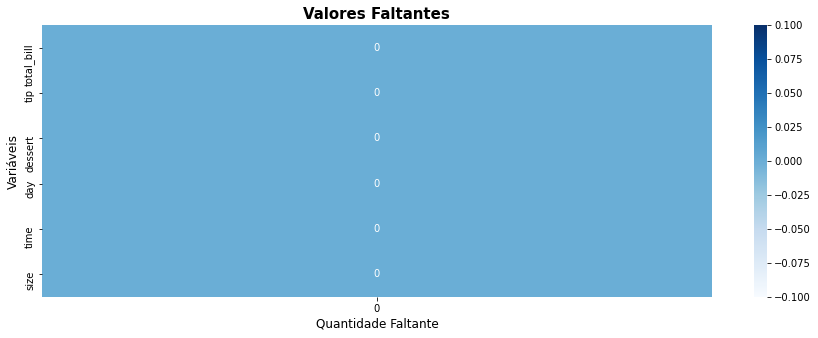

In [455]:
plt.figure(figsize=(15,5))
plt.title('Valores Faltantes',fontweight='bold', fontsize=15)
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='Blues')
ax.set_ylabel("Variáveis", fontsize=12)
ax.set_xlabel('Quantidade Faltante', fontsize=12)
plt.show()

In [456]:
df.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [457]:
print("Valores únicos:\n")
for field in df.columns:
    if np.dtype(df[field]) == 'object': print("{} --> {}".format(field,df[field].unique()))
df.nunique().to_frame().T

Valores únicos:

dessert --> ['No' 'Yes']
day --> ['Sun' 'Sat' 'Thur' 'Fri']
time --> ['Dinner' 'Lunch']


,total_bill,tip,dessert,day,time,size
0,229,123,2,4,2,6


## 02. Alterando os valores para o português

In [458]:
df.dessert=df.dessert.map({"No":"Não", "Yes":"Sim"})
df.day=df.day.map({"Sun":"Dom", "Sat":"Sab", "Thur":"Qui", "Fri":"Sex"})
df.time=df.time.map({"Dinner":"Jantar", "Lunch":"Almoço"})

df.rename(columns={'total_bill':'Valor da Conta', 'tip':'Gorjeta', 'dessert':'Sobremesa', 
                   'day':'Dia da Semana', 'time':'Refeição', 'size':'Total de Pessoas'}, inplace=True)
df.columns.name = 'Índice'

In [459]:
df.head()

Índice,Valor da Conta,Gorjeta,Sobremesa,Dia da Semana,Refeição,Total de Pessoas
0,16.99,1.01,Não,Dom,Jantar,2
1,10.34,1.66,Não,Dom,Jantar,3
2,21.01,3.50,Não,Dom,Jantar,3
3,23.68,3.31,Não,Dom,Jantar,2
4,24.59,3.61,Não,Dom,Jantar,4


## 03. Analisando os dados

In [460]:
df['Gorjeta (%)'] = round(df["Gorjeta"] / df["Valor da Conta"], 4)*100
df[:5]

Índice,Valor da Conta,Gorjeta,Sobremesa,Dia da Semana,Refeição,Total de Pessoas,Gorjeta (%)
0,16.99,1.01,Não,Dom,Jantar,2,5.94
1,10.34,1.66,Não,Dom,Jantar,3,16.05
2,21.01,3.50,Não,Dom,Jantar,3,16.66
3,23.68,3.31,Não,Dom,Jantar,2,13.98
4,24.59,3.61,Não,Dom,Jantar,4,14.68


Text(0, 0.5, 'Gorjeta (%)')

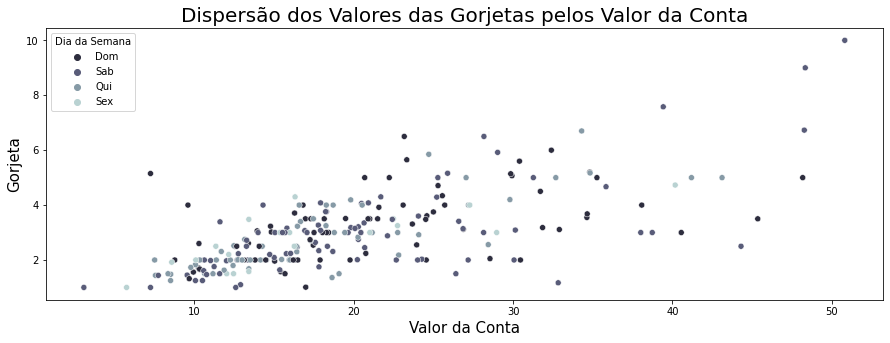

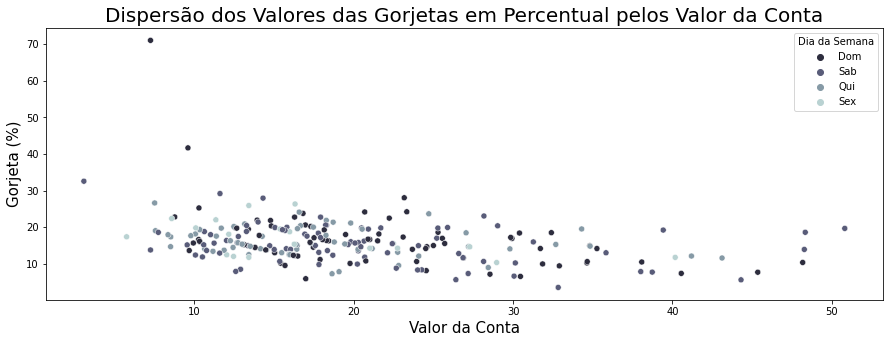

In [461]:
plt.figure(figsize=(15,5))
ax = sns.scatterplot(x='Valor da Conta', y='Gorjeta', hue='Dia da Semana', data=df, legend='full', palette='bone')
ax.set_title("Dispersão dos Valores das Gorjetas pelos Valor da Conta", fontsize=20)
ax.set_xlabel("Valor da Conta", fontsize=15)
ax.set_ylabel("Gorjeta", fontsize=15)

plt.figure(figsize=(15,5))
ax_1 = sns.scatterplot(x='Valor da Conta', y='Gorjeta (%)', hue='Dia da Semana', data=df, legend='full', palette='bone')
ax_1.set_title("Dispersão dos Valores das Gorjetas em Percentual pelos Valor da Conta", fontsize=20)
ax_1.set_xlabel("Valor da Conta", fontsize=15)
ax_1.set_ylabel("Gorjeta (%)", fontsize=15)

In [462]:
df.corr()

Índice,Valor da Conta,Gorjeta,Total de Pessoas,Gorjeta (%)
Índice,,,,
Valor da Conta,1.000000,0.675734,0.598315,-0.338629
Gorjeta,0.675734,1.000000,0.489299,0.342361
Total de Pessoas,0.598315,0.489299,1.000000,-0.142844
Gorjeta (%),-0.338629,0.342361,-0.142844,1.000000


Das Primeiras Análises, podes-se perceber que:

1. O Valor da gorjeta tente a aumentar de acordo com o aumento do valor da conta;
2. O total de pessoas têm alta influência no valor das gorjetas. Porém, há uma maior dispersão ao aumentar o valor da conta. Podemos perceber pelo gráfico de dispersão em conjunto com o valor da correlação linear entre as variáveis.

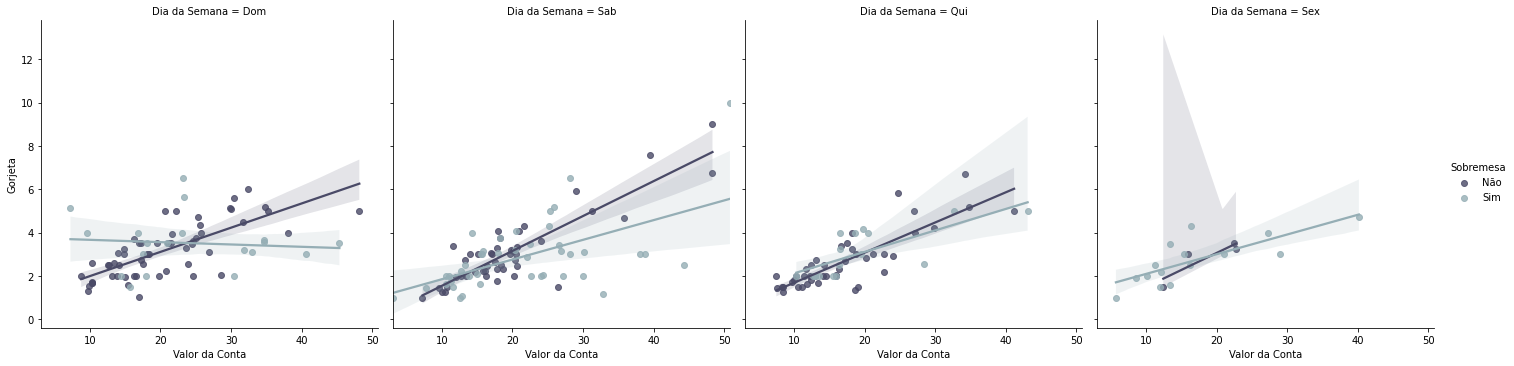

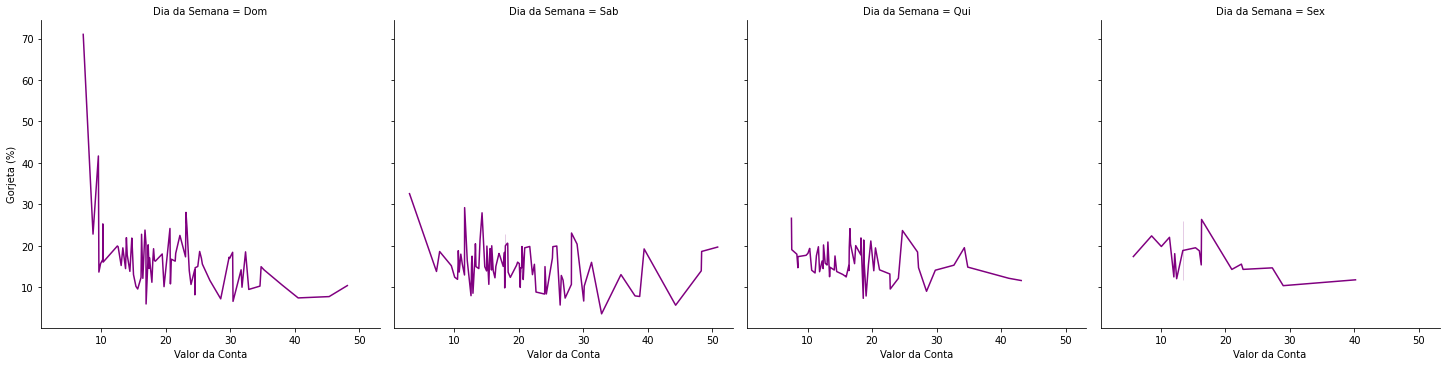

In [463]:
sns.lmplot(x='Valor da Conta', y='Gorjeta', col='Dia da Semana', hue='Sobremesa', data=df, legend='full', palette='bone');

sns.relplot(x='Valor da Conta', y='Gorjeta (%)', kind='line', data=df, color='purple', col="Dia da Semana");

Text(0, 0.5, 'Porcentagem da Gorjeta (%)')

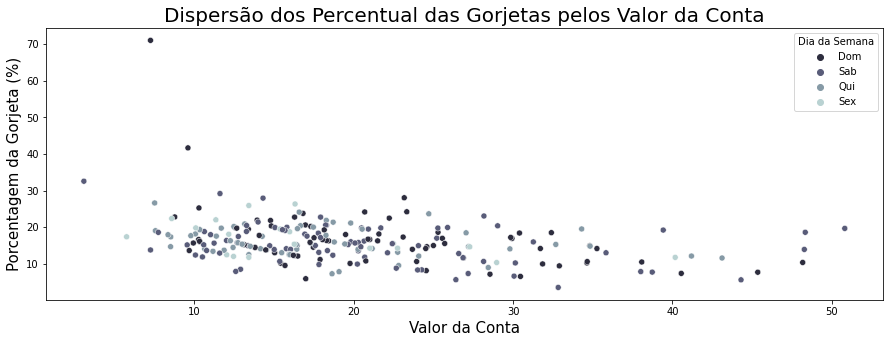

In [464]:
plt.figure(figsize=(15,5))
ax=sns.scatterplot(x='Valor da Conta', y='Gorjeta (%)', hue='Dia da Semana', data=df, palette='bone');
ax.set_title("Dispersão dos Percentual das Gorjetas pelos Valor da Conta", fontsize=20)
ax.set_xlabel("Valor da Conta", fontsize=15)
ax.set_ylabel("Porcentagem da Gorjeta (%)", fontsize=15)

Observações:

1. É importante notar que quem não come sobremesa, gealmente, dá um valor de gorjeta maior para que come sobremesa;
2. Em dias de semana (quinta e sexta), quase não há diferença nos valores das gorjetas para quem come ou não sobremesa;
3. O aumento do valor da contar não aumenta, necessariaento, o percentual de gorjeta dado.

## 04. Aprofundando a Análise

In [465]:
df.head(3)

Índice,Valor da Conta,Gorjeta,Sobremesa,Dia da Semana,Refeição,Total de Pessoas,Gorjeta (%)
0,16.99,1.01,Não,Dom,Jantar,2,5.94
1,10.34,1.66,Não,Dom,Jantar,3,16.05
2,21.01,3.50,Não,Dom,Jantar,3,16.66


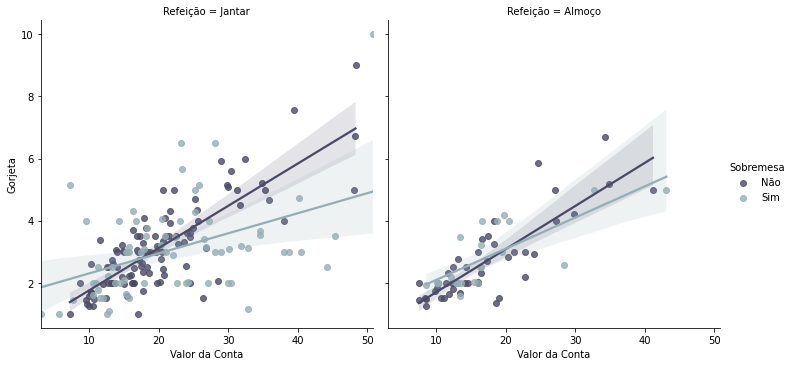

In [466]:
sns.lmplot(x='Valor da Conta', y='Gorjeta', col='Refeição', hue='Sobremesa', data=df, legend='full', palette='bone');

Observação:

- É possível notar que há uma diferença crescente na gorjeta dada com relação à refeição do dia.
- Ainda que quem não coma sobremesa dê uma gorjeta maior, no almoço essa diferença não é tão expressiva quanto no jantar, em valores absolutos. Mas essa diferença é maior em termos percentuais?

In [467]:
df_trat=df.copy()
df_trat=df_trat.groupby(["Dia da Semana"])[["Valor da Conta","Gorjeta"]].sum().reset_index()
df_trat["Gorjeta (%)"]=round(df_trat["Gorjeta"]/df_trat["Valor da Conta"],4)*100
df_trat["Ordem"] = [4,1,3,2]
df_trat = df_trat.set_index("Ordem").sort_index()
df_trat

Índice,Dia da Semana,Valor da Conta,Gorjeta,Gorjeta (%)
Ordem,,,,
1,Qui,1096.33,171.83,15.67
2,Sex,325.88,51.96,15.94
3,Sab,1778.40,260.40,14.64
4,Dom,1627.16,247.39,15.20


In [468]:
print("Porcentagen de arrecadação da sexta-feira em relação à quinta-feira")
round(100*df_trat["Valor da Conta"].iloc[1] / df_trat["Valor da Conta"].iloc[0],2)

Porcentagen de arrecadação da sexta-feira em relação à quinta-feira


29.72

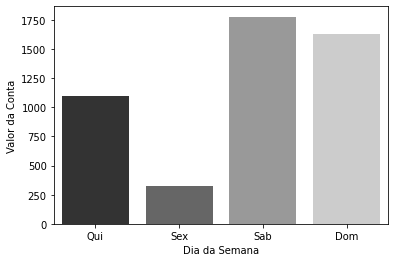

In [469]:
ax_2=sns.barplot(data=df_trat, x="Dia da Semana", y="Valor da Conta", palette='gray')

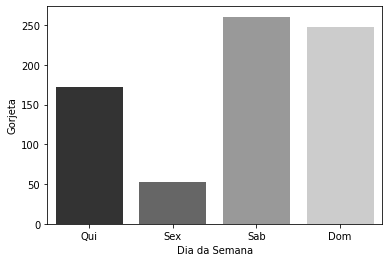

In [470]:
ax=sns.barplot(data=df_trat, x="Dia da Semana", y="Gorjeta", palette='gray')

Maiores Vendas do Restaurante em ordem: 
- Sábado > Domingo > Quinta > Sexta

Maiores Gorjetas do Restaurante em ordem: 
- Sábado > Domingo > Quinta > Sexta

In [471]:
df_2=df.copy()
df_2["Ordem"] = df_2["Dia da Semana"].map({"Qui":1,"Sex":2,"Sab":3,"Dom":4})
df_2 = df_2.set_index("Ordem").sort_index()
df_2.sample(3)

Índice,Valor da Conta,Gorjeta,Sobremesa,Dia da Semana,Refeição,Total de Pessoas,Gorjeta (%)
Ordem,,,,,,,
4,17.26,2.74,Não,Dom,Jantar,3,15.87
2,15.38,3.00,Sim,Sex,Jantar,2,19.51
4,14.83,3.02,Não,Dom,Jantar,2,20.36


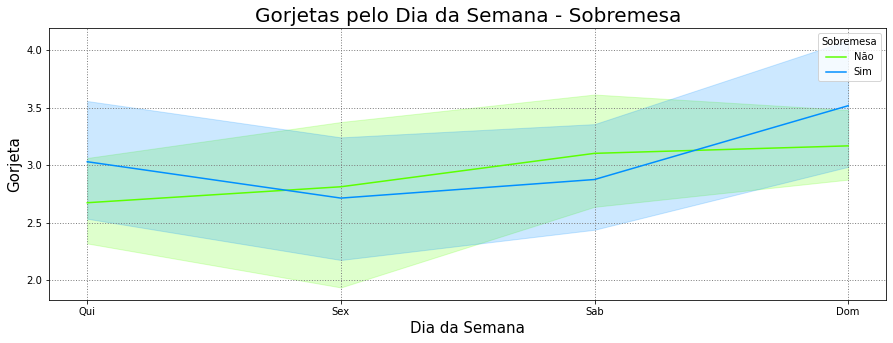

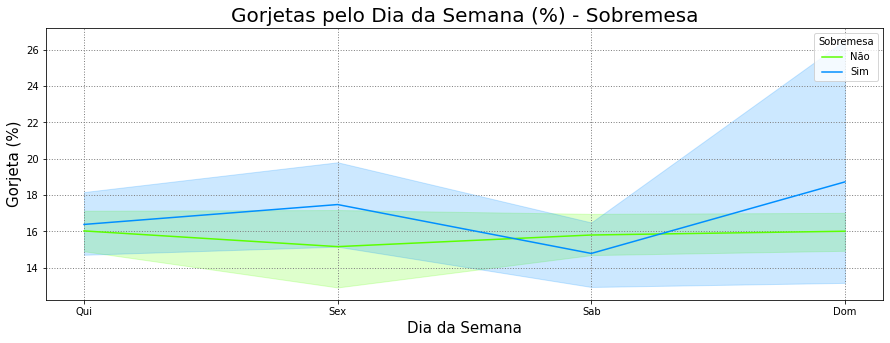

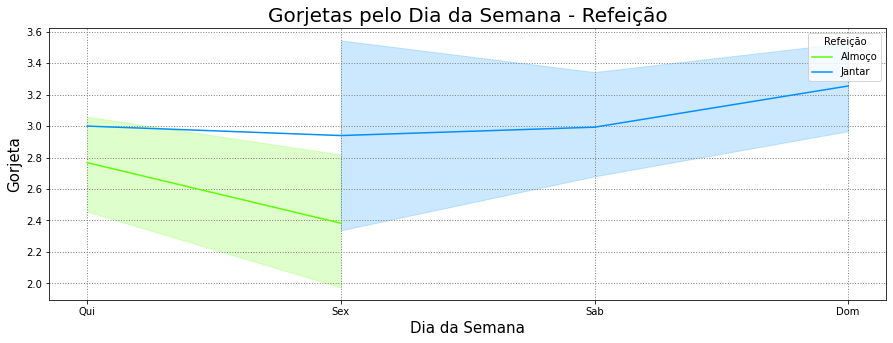

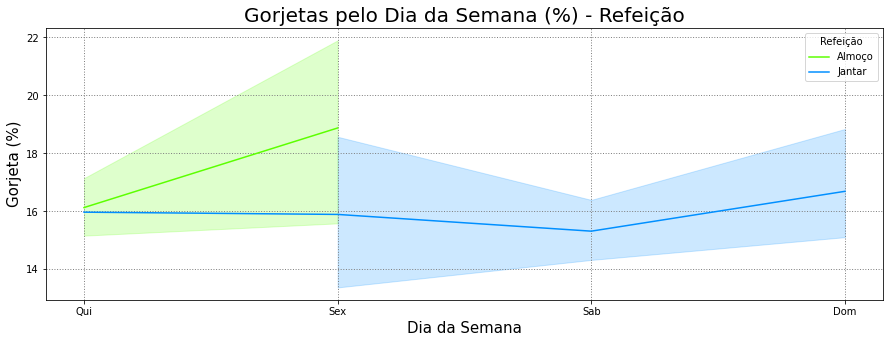

In [472]:
plt.figure(figsize=(15,5))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
ax = sns.lineplot(data=df_2,x="Dia da Semana",y="Gorjeta", hue="Sobremesa", palette='gist_rainbow')
ax.set_title("Gorjetas pelo Dia da Semana - Sobremesa", fontsize=20)
ax.set_ylabel("Gorjeta", fontsize=15)
ax.set_xlabel("Dia da Semana", fontsize=15);

plt.figure(figsize=(15,5))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
ax_1 = sns.lineplot(data=df_2,x="Dia da Semana",y="Gorjeta (%)", hue="Sobremesa", palette='gist_rainbow')
ax_1.set_title("Gorjetas pelo Dia da Semana (%) - Sobremesa", fontsize=20)
ax_1.set_ylabel("Gorjeta (%)", fontsize=15)
ax_1.set_xlabel("Dia da Semana", fontsize=15);

plt.figure(figsize=(15,5))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
ax_2 = sns.lineplot(data=df_2,x="Dia da Semana",y="Gorjeta", hue="Refeição", palette='gist_rainbow')
ax_2.set_title("Gorjetas pelo Dia da Semana - Refeição", fontsize=20)
ax_2.set_ylabel("Gorjeta", fontsize=15)
ax_2.set_xlabel("Dia da Semana", fontsize=15);

plt.figure(figsize=(15,5))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
ax_3 = sns.lineplot(data=df_2,x="Dia da Semana",y="Gorjeta (%)", hue="Refeição", palette='gist_rainbow')
ax_3.set_title("Gorjetas pelo Dia da Semana (%) - Refeição", fontsize=20)
ax_3.set_ylabel("Gorjeta (%)", fontsize=15)
ax_3.set_xlabel("Dia da Semana", fontsize=15);

Interessante notar o comportamento das gorjetas no decorrer da semana:

1. Percentualmente falando, na quinta-feira, praticamente não faz diferença com quem pede ou não sobremesa. Mas em relação a valores absolutos, o valor arrecadado de gorjetas pra quem pedo sobremesa é maior;
2. No domingo, há maior diferença para quem come sobremesa. Ou seja, quem pede sobremesa dá maior gorjeta. Comportamento semelhante é percebido na sexta-feira;
3. No sábado, há maior gorjeta para quem não pede sobremesa.
4. Sobre a análise por refeição, não é possível fazer para os dias de sábado e domingo, pois só há almoço como refeição.

In [473]:
print("Soma total de gorjetas por refeição:")
porct_tip=df.groupby("Refeição")[['Gorjeta']].sum()
porct_tip['Gorjeta (%)'] = round(100*porct_tip / porct_tip.sum(), 2)
porct_tip

Soma total de gorjetas por refeição:


Índice,Gorjeta,Gorjeta (%)
Refeição,,
Almoço,185.51,25.36
Jantar,546.07,74.64


In [474]:
print("Quantidade total de gorjetas por refeição:")
display(round(100*df["Refeição"].value_counts(normalize=True).to_frame(),2))

Quantidade total de gorjetas por refeição:


,Refeição
Jantar,72.13
Almoço,27.87


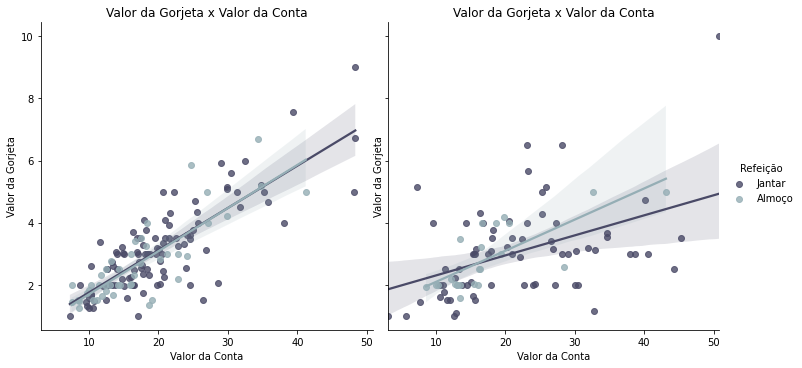

In [475]:
valor_gorjeta = sns.lmplot(x='Valor da Conta', y='Gorjeta', col='Sobremesa', hue='Refeição', data=df, palette='bone')
valor_gorjeta.set(xlabel='Valor da Conta', ylabel='Valor da Gorjeta', 
                  title='Valor da Gorjeta x Valor da Conta');

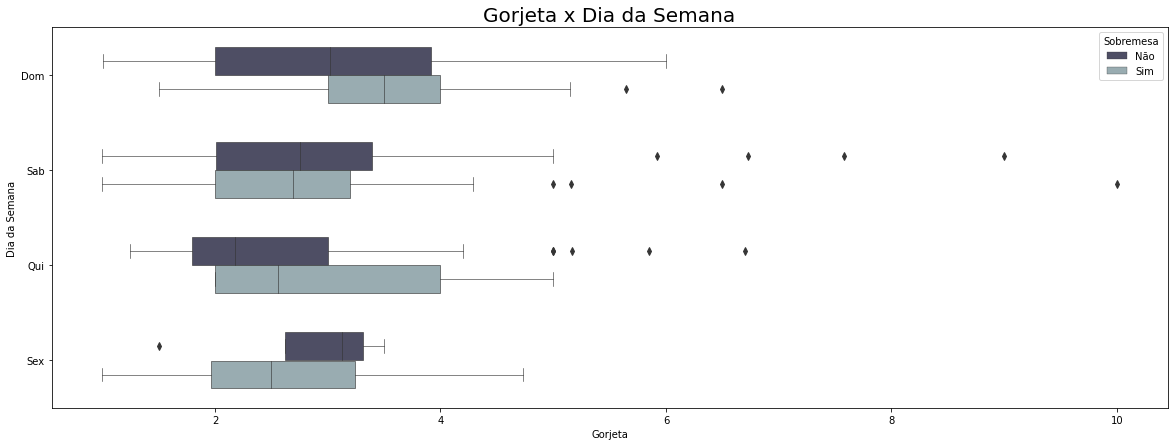

In [476]:
plt.figure(figsize=(20,7))
graph = sns.boxplot(df.Gorjeta, df["Dia da Semana"], df.Sobremesa, palette='bone', linewidth=0.6, width=0.6);
graph.set(xlabel='Gorjeta', ylabel='Dia da Semana')
graph.set_title('Gorjeta x Dia da Semana', fontsize=20);

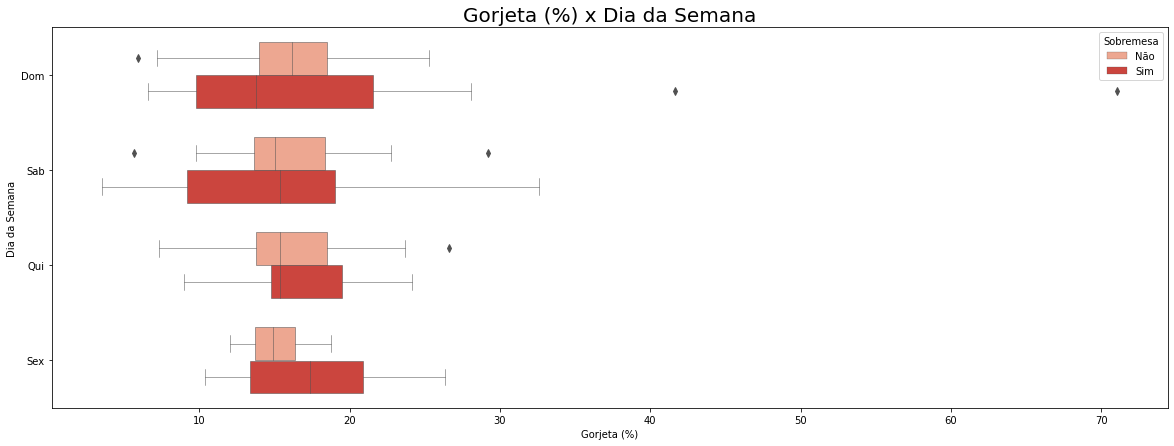

In [477]:
plt.figure(figsize=(20,7))
graph = sns.boxplot(df["Gorjeta (%)"], df["Dia da Semana"], df.Sobremesa, palette='Reds', linewidth=.5, width=0.7);
graph.set(xlabel='Gorjeta (%)', ylabel='Dia da Semana')
graph.set_title('Gorjeta (%) x Dia da Semana', fontsize=20);

A dispersão é menor para quem não pede sobremesa!

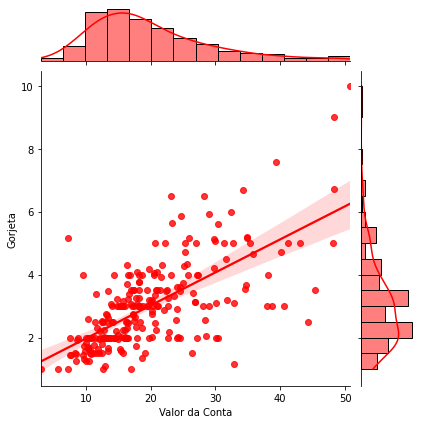

In [478]:
# "kind" must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
valor_gorjata_2 = sns.jointplot(x='Valor da Conta', y='Gorjeta',  kind='reg' ,data=df, color='red')

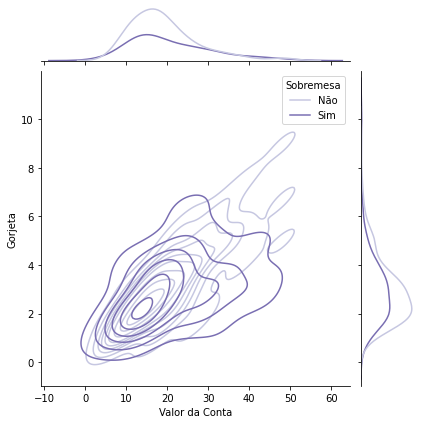

In [479]:
valor_gorjata_2 = sns.jointplot(x='Valor da Conta', y='Gorjeta', hue='Sobremesa',  kind='kde', data=df, palette='Purples')

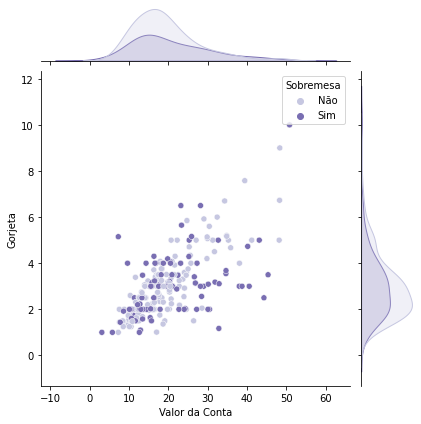

In [480]:
valor_gorjata_2 = sns.jointplot(x='Valor da Conta', y='Gorjeta', hue='Sobremesa', 
                                kind='scatter' ,data=df, palette='Purples')

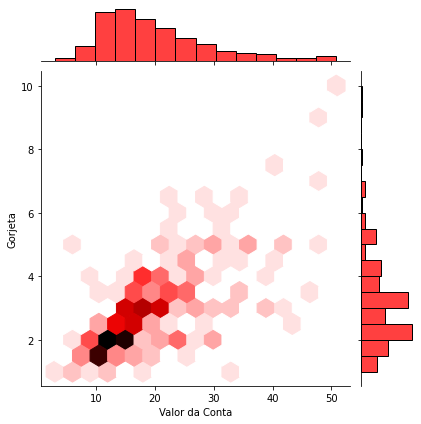

In [481]:
valor_gorjata_2 = sns.jointplot(x='Valor da Conta', y='Gorjeta', kind='hex' ,data=df, color='red')

## 05.Analisando a sobremesa

In [482]:
com_sobremesa=df.query("Sobremesa=='Sim'")
com_sobremesa[:5]

Índice,Valor da Conta,Gorjeta,Sobremesa,Dia da Semana,Refeição,Total de Pessoas,Gorjeta (%)
56,38.01,3.00,Sim,Sab,Jantar,4,7.89
58,11.24,1.76,Sim,Sab,Jantar,2,15.66
60,20.29,3.21,Sim,Sab,Jantar,2,15.82
61,13.81,2.00,Sim,Sab,Jantar,2,14.48
62,11.02,1.98,Sim,Sab,Jantar,2,17.97


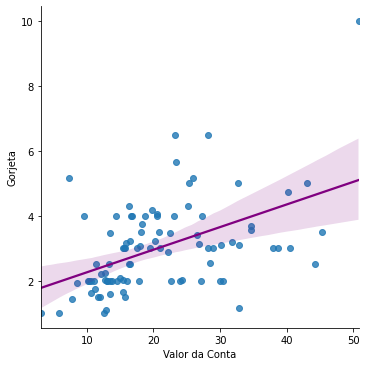

In [483]:
sns.lmplot(x='Valor da Conta',y='Gorjeta',data=com_sobremesa, 
           line_kws={'color':'purple'});

In [484]:
sem_sobremesa = df.query("Sobremesa=='Não'")
sem_sobremesa.head()

Índice,Valor da Conta,Gorjeta,Sobremesa,Dia da Semana,Refeição,Total de Pessoas,Gorjeta (%)
0,16.99,1.01,Não,Dom,Jantar,2,5.94
1,10.34,1.66,Não,Dom,Jantar,3,16.05
2,21.01,3.50,Não,Dom,Jantar,3,16.66
3,23.68,3.31,Não,Dom,Jantar,2,13.98
4,24.59,3.61,Não,Dom,Jantar,4,14.68


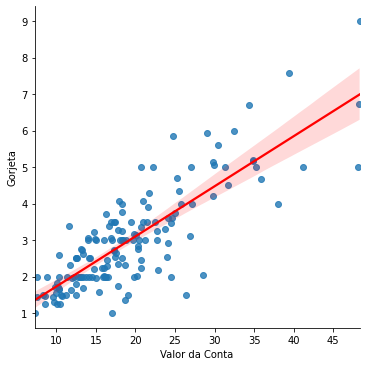

In [485]:
sns.lmplot(x='Valor da Conta',y='Gorjeta',data=sem_sobremesa, 
           line_kws={'color':'red'});

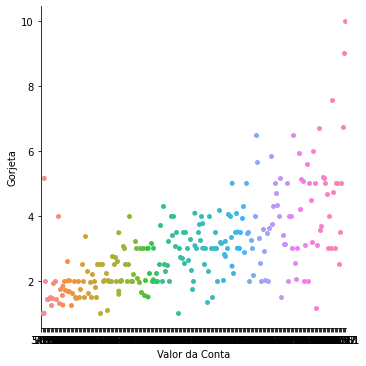

In [486]:
sns.catplot(x='Valor da Conta',y='Gorjeta',data=df)

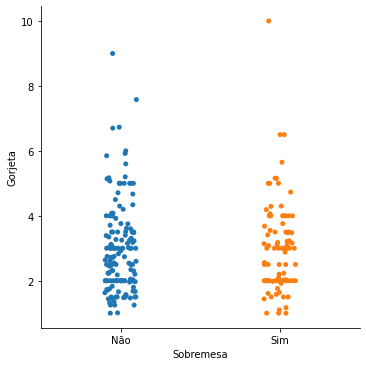

In [487]:
sns.catplot(x='Sobremesa',y='Gorjeta',data=df);

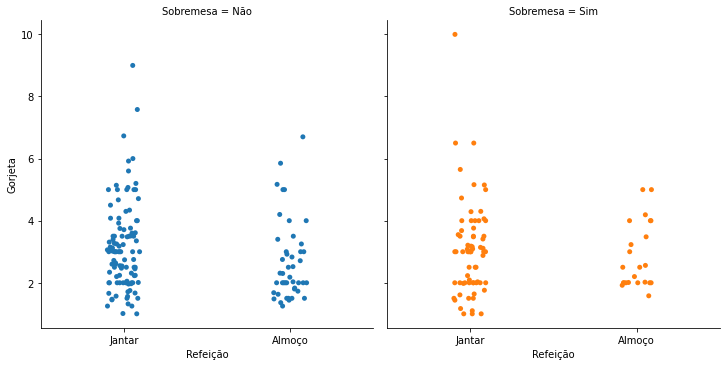

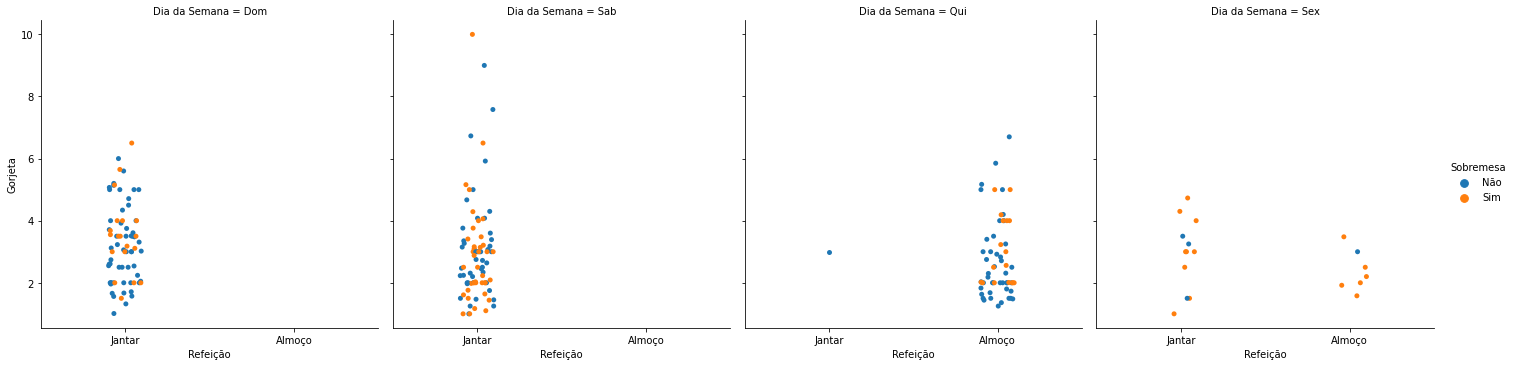

In [488]:
sns.catplot(x='Refeição',y='Gorjeta', col='Sobremesa', hue='Sobremesa',data=df);
sns.catplot(x='Refeição',y='Gorjeta', col='Dia da Semana', hue='Sobremesa',data=df);


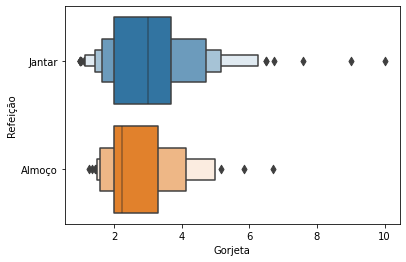

In [489]:
sns.boxenplot(df.Gorjeta, df['Refeição']);

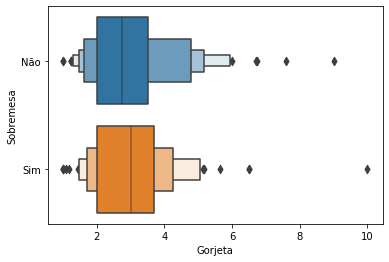

In [490]:
sns.boxenplot(df.Gorjeta, df.Sobremesa);

## 06.Testes de Hipóteses

<b>H0:</b> Distribuição de Taxa de gorjetas é a mesma nos dois grupos
    
<b>H1:</b> Distribuição de Taxa de gorjetas NÃO é a mesma nos dois grupos

In [491]:
from scipy.stats import ranksums

In [492]:
com_sobremesa[:5]

Índice,Valor da Conta,Gorjeta,Sobremesa,Dia da Semana,Refeição,Total de Pessoas,Gorjeta (%)
56,38.01,3.00,Sim,Sab,Jantar,4,7.89
58,11.24,1.76,Sim,Sab,Jantar,2,15.66
60,20.29,3.21,Sim,Sab,Jantar,2,15.82
61,13.81,2.00,Sim,Sab,Jantar,2,14.48
62,11.02,1.98,Sim,Sab,Jantar,2,17.97


In [493]:
com_sobremesa = com_sobremesa["Gorjeta (%)"]
sem_sobremesa = sem_sobremesa["Gorjeta (%)"]

In [494]:
estatistica_teste, p_valor = ranksums(com_sobremesa, sem_sobremesa)
print(f"O p-valor é: {p_valor.round(3)}")

O p-valor é: 0.559


Como o p-valor >0.05, seguimos com a hipótese nula! Utilizando o teste de Wilcoxon